<a href="https://colab.research.google.com/github/kochol/tf_tests/blob/master/test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test 01

This is the first test of my tf code.

In [31]:
import tensorflow as tf
from tensorflow.keras import layers

# enable tf eager execution to support iterating
tf.enable_eager_execution()

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


## Create the model

Now create the model

In [32]:
inputs = tf.keras.Input(shape=(7,))  # Returns a placeholder tensor

# A layer instance is callable on a tensor, and returns a tensor.
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
predictions = layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=predictions)

# I want to calc on float numbers so I use mse and mae for loss and metrics
# Also I have to find out which optimizer is good for me.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


## Load data from csv file

In [33]:
import pandas as pd
import numpy as np

# Download mydata.csv from github
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/kochol/tf_tests/master/mydata.csv

# load all data
mydata = pd.read_csv("mydata.csv")

print(mydata.columns)
print(mydata.dtypes)
print(mydata.shape)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  154k  100  154k    0     0   710k      0 --:--:-- --:--:-- --:--:--  710k
Index(['start', 'open', 'high', 'low', 'close', 'vwp', 'volume', 'trades'], dtype='object')
start       int64
open      float64
high      float64
low       float64
close     float64
vwp       float64
volume    float64
trades      int64
dtype: object
(1884, 8)


Prepare the data for training

In [44]:
train = pd.DataFrame(
    {
        'open': mydata[0:-101].open.astype('int32'),
        'high': mydata[0:-101].high.astype('int32'),
        'low': mydata[0:-101].low.astype('int32'),
        'close': mydata[0:-101].close.astype('int32'),
        'vwp': mydata[0:-101].vwp.astype('int32'),
        'volume': mydata[0:-101].volume.astype('int32'),
        'trades': mydata[0:-101].trades.astype('int32')
    })
print(train.columns)
print(train.dtypes)
print(train.shape)

test = pd.DataFrame({'price': mydata[1:-100].close.astype('int32')})
print(test.columns)
print(test.dtypes)
print(test.shape)

val_in = pd.DataFrame(
    {
        'open': mydata[-100:].open.astype('int32'),
        'high': mydata[-100:].high.astype('int32'),
        'low': mydata[-100:].low.astype('int32'),
        'close': mydata[-100:].close.astype('int32'),
        'vwp': mydata[-100:].vwp.astype('int32'),
        'volume': mydata[-100:].volume.astype('int32'),
        'trades': mydata[-100:].trades.astype('int32')
    })
print(val_in.shape)

val_test = pd.DataFrame({'price': mydata[-100:].close.astype('int32')})
print(val_test.shape)

Index(['open', 'high', 'low', 'close', 'vwp', 'volume', 'trades'], dtype='object')
open      int32
high      int32
low       int32
close     int32
vwp       int32
volume    int32
trades    int32
dtype: object
(1783, 7)
Index(['price'], dtype='object')
price    int32
dtype: object
(1783, 1)
(100, 7)
(100, 1)


## Train the model

In [35]:
train_np = train.to_numpy()
test_np = test.to_numpy()
model.fit(train_np, test_np, epochs=1000, batch_size=32)#, validation_split = 0.2)

Epoch 1/1000
1783/1783 [==============================] - 0s 81us/sample - loss: 357332.2470 - mean_absolute_error: 265.4525 - mean_squared_error: 357332.4375
Epoch 2/1000
1783/1783 [==============================] - 0s 40us/sample - loss: 64723.7566 - mean_absolute_error: 190.2763 - mean_squared_error: 64723.7617
Epoch 3/1000
1783/1783 [==============================] - 0s 40us/sample - loss: 67909.5451 - mean_absolute_error: 186.4066 - mean_squared_error: 67909.5547
Epoch 4/1000
1783/1783 [==============================] - 0s 44us/sample - loss: 40147.3581 - mean_absolute_error: 111.9080 - mean_squared_error: 40147.3555
Epoch 5/1000
1783/1783 [==============================] - 0s 43us/sample - loss: 46208.9913 - mean_absolute_error: 164.8950 - mean_squared_error: 46208.9922
Epoch 6/1000
1783/1783 [==============================] - 0s 47us/sample - loss: 41839.8447 - mean_absolute_error: 173.6665 - mean_squared_error: 41839.8438
Epoch 7/1000
1783/1783 [==============================] 

Text(0.5, 1.0, 'BTC price prediction')

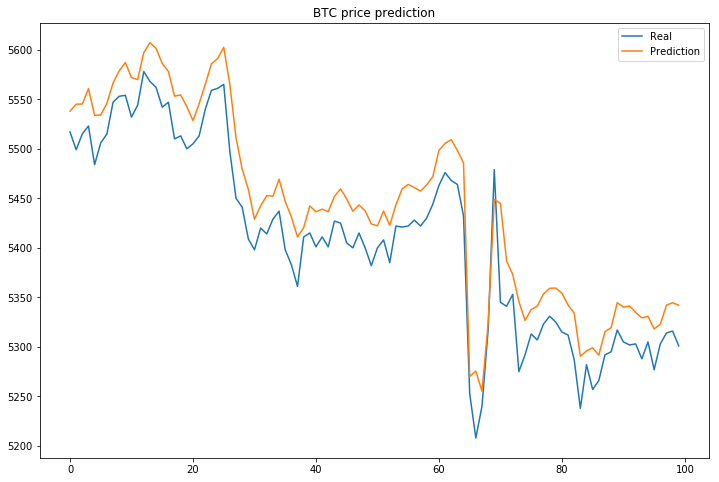

In [45]:
example_batch = val_in.to_numpy()
example_result = model.predict(example_batch)

import matplotlib.pyplot as plt
ex_b = pd.DataFrame({'price': val_test.price})
ex_r = pd.DataFrame(example_result)

plt.figure(figsize = (12,8))
plt.plot(ex_r.index, ex_b,label = 'Real')
plt.plot(ex_r.index, ex_r, label = 'Prediction')
plt.legend(loc = 'best')
plt.title('BTC price prediction')